In [6]:
import os
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

C:\Users\pingh\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# 設定 data_path
dir_data = './data/'

In [49]:
f_app = os.path.join(dir_data, 'train.csv')
train_df = pd.read_csv(f_app,header=None)

f_app = os.path.join(dir_data, 'trainLabels.csv')
train_label_df = pd.read_csv(f_app,header=None)
train_label_df.columns =['Target']

f_app = os.path.join(dir_data, 'test.csv')
test_df = pd.read_csv(f_app,header=None)

print(f' training data shape : ',train_df.shape )
print(f' training label shape : ',train_label_df.shape)
print(f' testing data shape : ',test_df.shape)

 training data shape :  (1000, 40)
 training label shape :  (1000, 1)
 testing data shape :  (9000, 40)


In [50]:
train_label_df.describe()

,Target
count,1000.00000
mean,0.51000
std,0.50015
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,1.00000


In [56]:
print('train_label null:',train_label_df.isnull().any(axis=0).sum())
print('train null:',train_df.isnull().any(axis=0).sum())
print('test null:',test_df.isnull().any(axis=0).sum())

train_label null: 0
train null: 0
test null: 0


In [60]:
clf = GradientBoostingClassifier()

x_train, x_test, y_train, y_test = train_test_split(train_df,train_label_df, test_size = 0.2, random_state = 2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(' Accuracy : ',metrics.accuracy_score(y_pred,y_test))

C:\Users\pingh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Accuracy :  0.885


In [71]:
Y_pred=clf.predict(test_df)
Y_pred.shape

(9000,)

In [68]:
output = pd.DataFrame({'Id' : np.arange(1,9001,1), 'Solution' : Y_pred})
output.head(10)

,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
5,6,0
6,7,0
7,8,1
8,9,0
9,10,0


In [69]:
output.to_csv('Submission.csv', index = False)

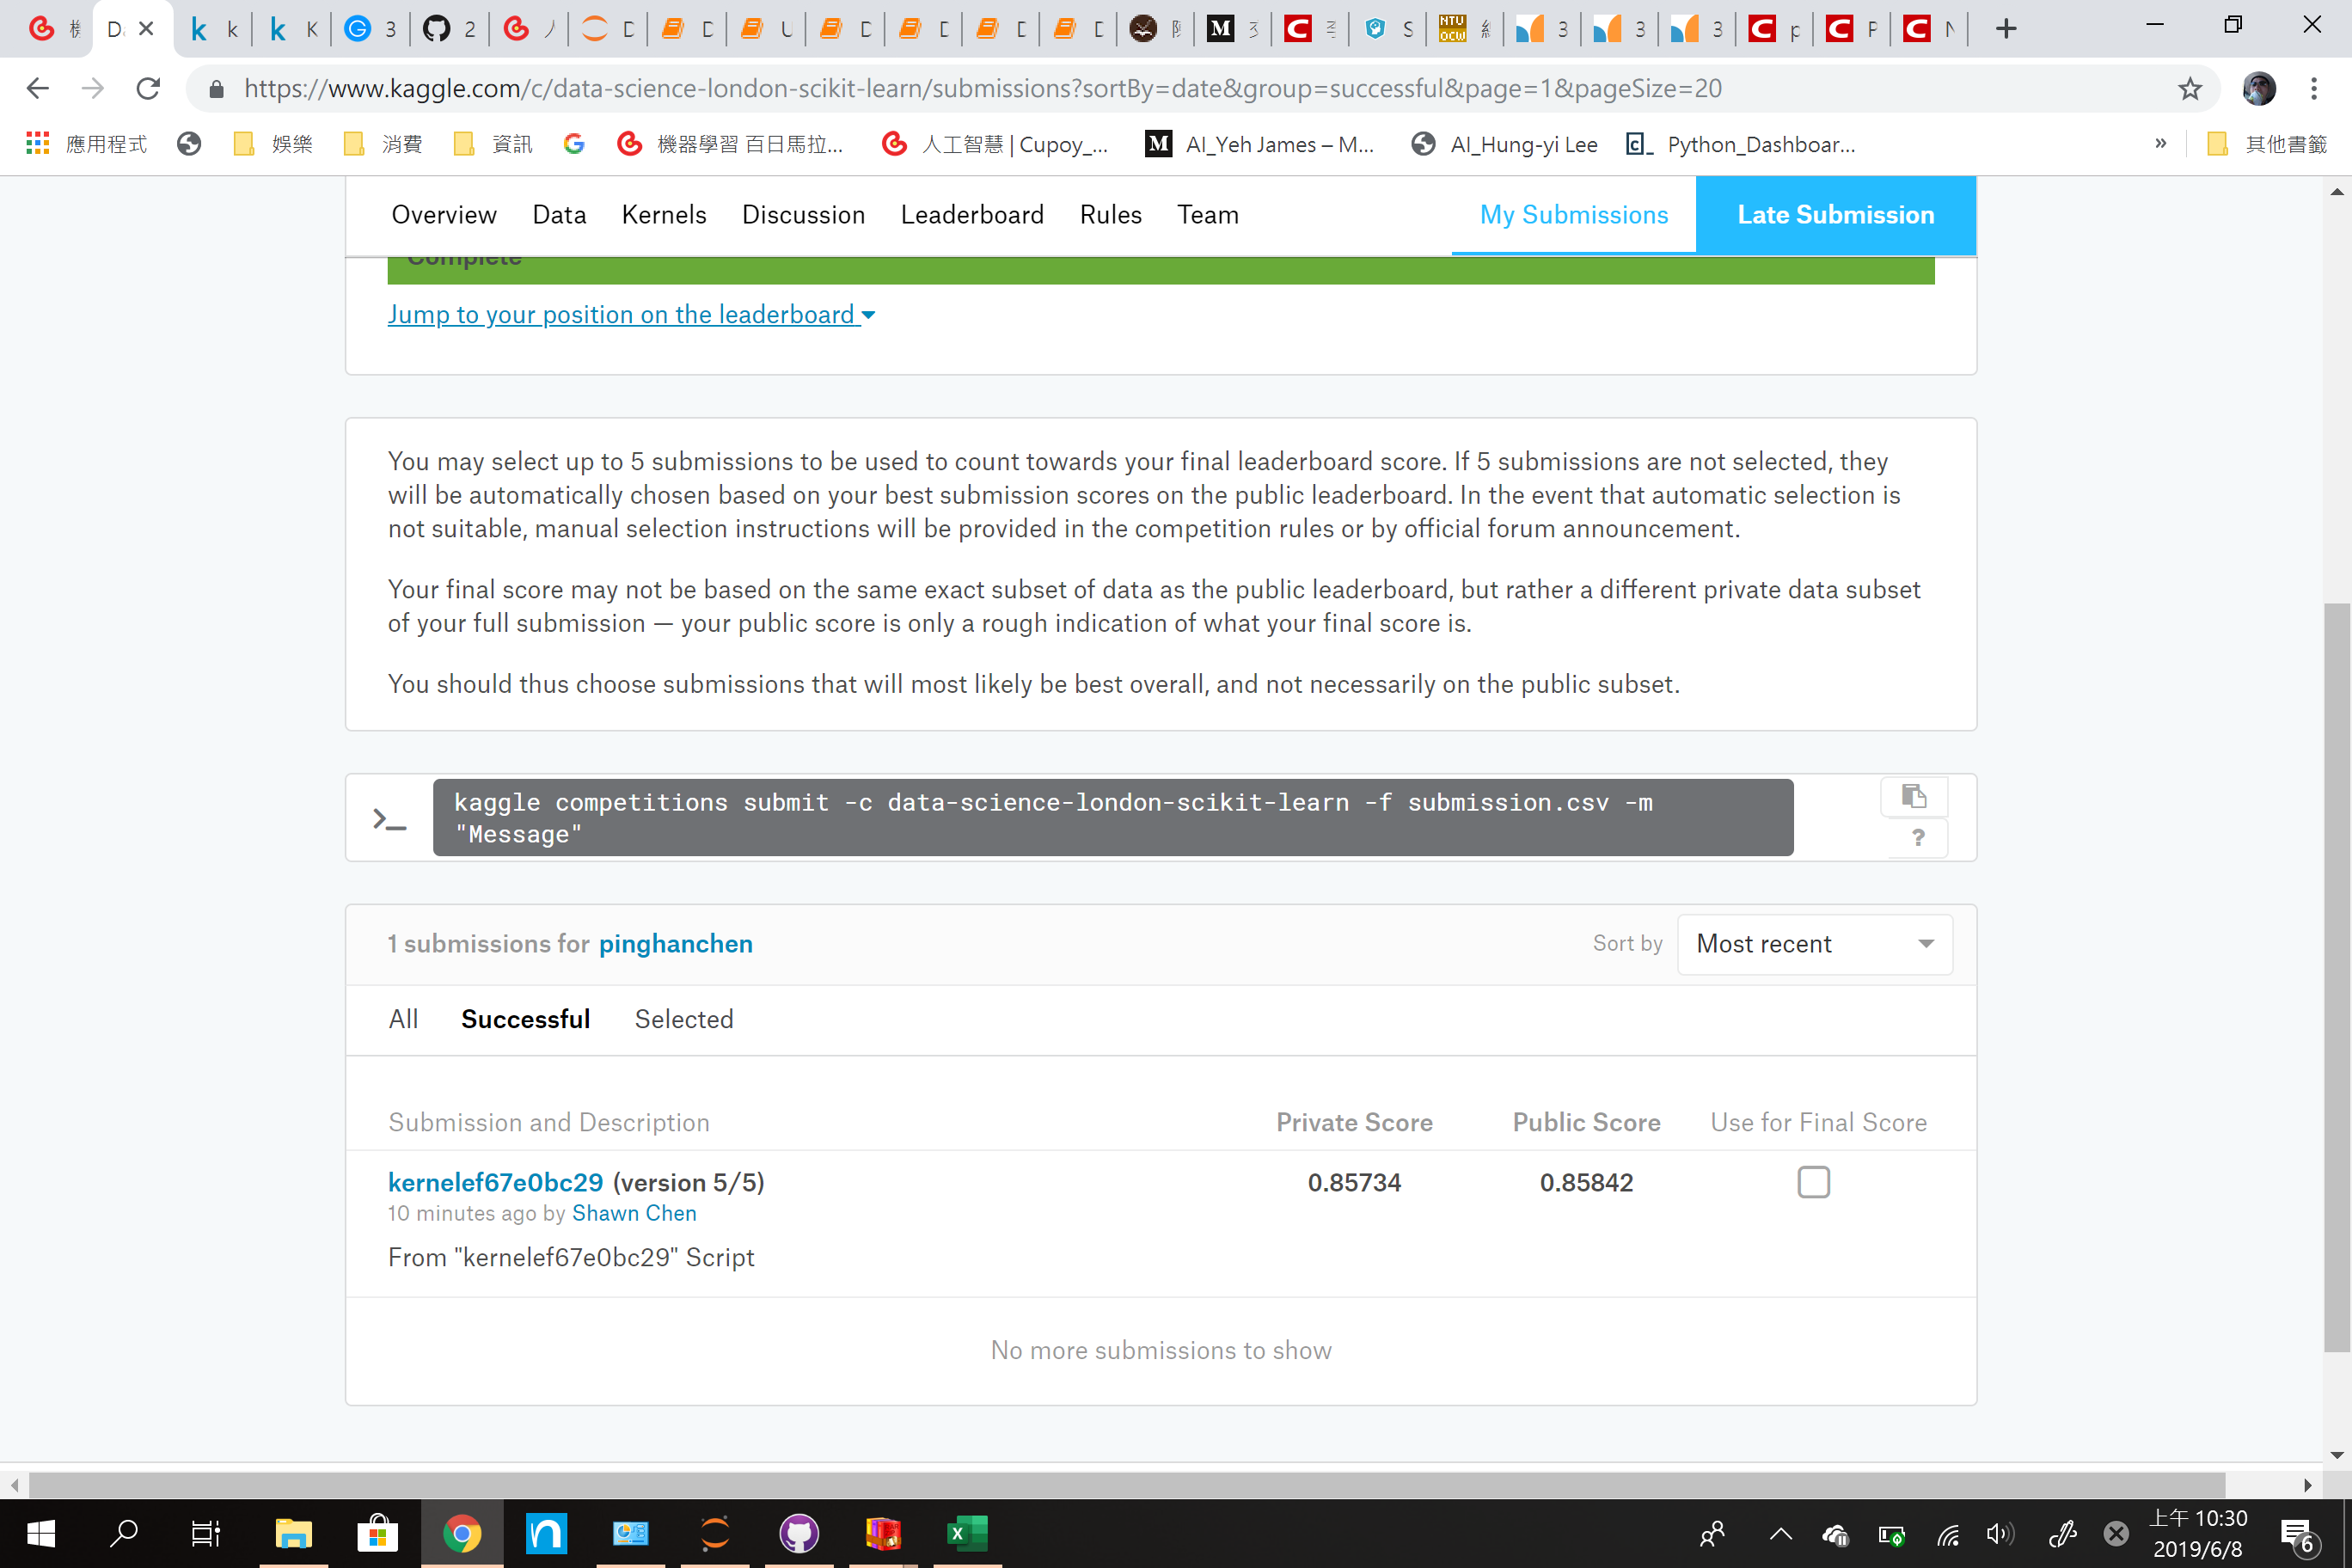